In [27]:
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:80%!important;}</style>'))

In [16]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 
# 図やグラフを図示するためのライブラリをインポートする。
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import genfromtxt
%matplotlib inline
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [17]:
df=pd.read_csv( 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',sep=';')

In [18]:
print(df)
df = df.values
df

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [19]:
#x = array[:, :]

# 行列の標準化
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(df)
dfs = scaler.transform(df)
dfs

array([[0.19347777, 0.01830195, 0.        , ..., 0.01464156, 0.24576906,
        0.13072822],
       [0.10698874, 0.01207052, 0.        , ..., 0.00932722, 0.13442175,
        0.06858252],
       [0.13494887, 0.01314886, 0.00069205, ..., 0.01124574, 0.16955114,
        0.08650569],
       ...,
       [0.1222319 , 0.00989496, 0.00252225, ..., 0.01455142, 0.21342078,
        0.11641133],
       [0.10524769, 0.01150589, 0.00214063, ..., 0.0126654 , 0.18195363,
        0.08919296],
       [0.12491328, 0.00645385, 0.00978487, ..., 0.01374046, 0.22900768,
        0.12491328]])

In [20]:
#主成分分析の実行
#pca = PCA(n_components=2)
#pca.fit(dfs)
pca = PCA(n_components=3).fit(dfs)
dfs = pca.transform(dfs)
print(dfs)

[[-0.06226043 -0.0293121  -0.00242508]
 [-0.2193912   0.03026089  0.0033123 ]
 [-0.17991885 -0.05794352 -0.00357798]
 ...
 [-0.08238251  0.27238643 -0.01537839]
 [-0.12463761  0.28114003 -0.00849609]
 [-0.10495153  0.06640192 -0.03869012]]


In [21]:
print(pca.explained_variance_ratio_)

[0.75725724 0.18160543 0.02657549]


In [22]:
print(pca.components_)

[[ 0.48449182  0.02625397  0.01755007  0.13012392  0.00433397 -0.04589031
  -0.50135774  0.05343004  0.17589504  0.03343681  0.59798215  0.31836987]
 [-0.13056439 -0.00156663 -0.01083291 -0.03069518 -0.00121341  0.96060215
  -0.2426979  -0.00423402 -0.00638665 -0.00286383 -0.01153241 -0.00554871]
 [ 0.838773   -0.03616852  0.06630953 -0.04907813  0.00149942  0.12728184
   0.08536878 -0.01705897 -0.12499613  0.00537101 -0.48262329 -0.12643659]]


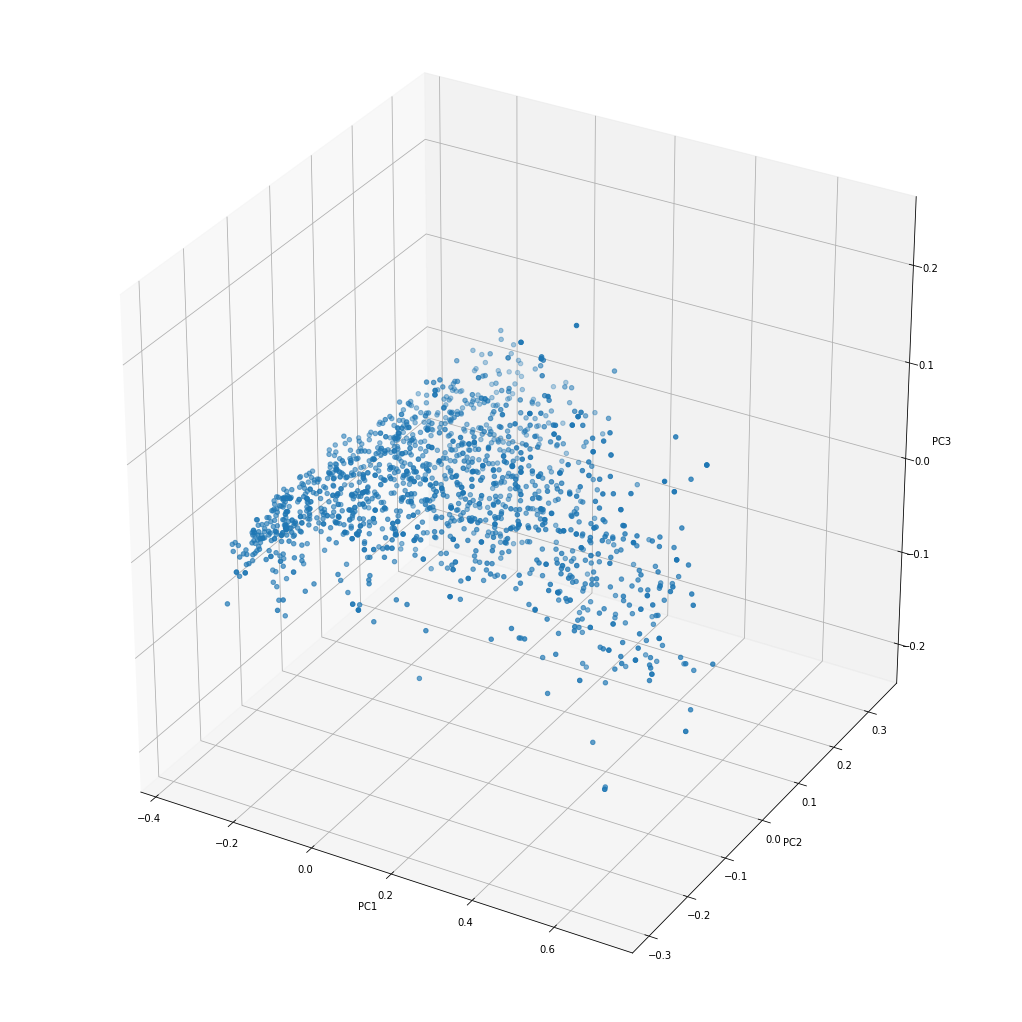

In [26]:
fig = pyplot.figure(figsize=(14,14))
ax = Axes3D(fig)

ax.scatter(dfs[:, 0], dfs[:, 1], dfs[:, 2])
plt.grid()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()